In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (11.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121666 files and direc

# 단속정보/신고현황 각자 시각화해서 가장 많이 적발된 지역 꼽아오기


In [1]:
import pandas as pd

In [ ]:
df1 = pd.read_csv('서울시불법주정차전용차로위반단속CCTV위치정보.csv',encoding='cp949')
df1.head(3)

,고정형CCTV지번주소,위도,경도,자치구,단속지점명,현장구분
0,목4동 762-10,37.535891,126.870566,양천구,목4동 영도초등학교 주변,불법주정차구역
1,목4동 797-8,37.532740,126.867191,양천구,목4동 태학관 주변,불법주정차구역
2,신월2동 496,37.524535,126.848224,양천구,신월2동 양강초교 후문 주변,불법주정차구역


In [ ]:
df2 = pd.read_csv('불법주정차단속위치정보.csv',encoding='cp949')
df2.head(3)

,단속일,시간,구주소,도로명,경도,위도
0,20221101,0:00:00,서울 양천구 목동 902,서울특별시 양천구 목동서로 70,126.879175,37.537131
1,20221101,0:00:00,서울 광진구 중곡동 74-1,서울특별시 광진구 긴고랑로44길 4,127.094797,37.559815
2,20221101,0:00:00,서울 구로구 개봉동 489-2,서울특별시 구로구 개봉로2길 87-5,126.859562,37.489028


# 단속정보/신고현황 각자 시각화해서 가장 많이 적발된 지역 꼽아오기

In [2]:
df3 = pd.read_csv('불법주정차신고현황.csv',encoding='utf-8')
df3.head(3)

,민원접수일,민원접수시간,주소,경도,위도
0,20221101,00:00:00,서울특별시 도봉구 노해로63길 84-9,127.046900,37.652460
1,20221101,00:02:00,서울 은평구 증산동 199-14,126.904228,37.578658
2,20221101,00:02:00,서울특별시 도봉구 노해로65길 10,127.046727,37.651949


In [3]:
len(df3)

1466617

In [4]:
idx = df3['주소'].duplicated()
duplicates_rows = df3[idx]
duplicates_rows

,민원접수일,민원접수시간,주소,경도,위도
28,20221101,00:20:00,서울특별시 금천구?독산동?1007-13,126.896309,37.465815
67,20221101,01:35:00,삼성동 11 롯데캐슬프레미어 103동과 옆단지 래미안2차 108동 사잇길,127.044744,37.515274
68,20221101,01:35:00,삼성동 9-5 김영모제과점 앞 인도 위와 옆,127.042653,37.515138
80,20221101,02:16:00,서울특별시 도봉구 도봉로126길 19,127.038622,37.652692
96,20221101,03:20:00,서울특별시 송파구 중대로 24,127.118060,37.488962
...,...,...,...,...,...
1466611,20231031,23:53:00,(대학동) 대학길 115 (대학18길초입),126.937934,37.465683
1466612,20231031,23:55:00,서울특별시 용산구 한남대로20길 47-10,127.009894,37.535221
1466613,20231031,23:56:00,서울특별시 양천구 목동중앙서로7나길 11,126.865180,37.534377
1466614,20231031,23:59:00,서울특별시 서초구 반포대로 304 금정빌딩,127.001042,37.506165


In [5]:
df3['구'] = df3['주소'].str.extract(r'(.*구)')
df3['구'] = df3['구'].str.replace('서울특별시 ','')
df3

,민원접수일,민원접수시간,주소,경도,위도,구
0,20221101,00:00:00,서울특별시 도봉구 노해로63길 84-9,127.046900,37.652460,도봉구
1,20221101,00:02:00,서울 은평구 증산동 199-14,126.904228,37.578658,서울 은평구
2,20221101,00:02:00,서울특별시 도봉구 노해로65길 10,127.046727,37.651949,도봉구
3,20221101,00:03:00,(중앙동) 남부순환로 1777-7(프라비다M),126.947632,37.482400,NaN
4,20221101,00:03:00,서울특별시 도봉구 노해로65길 17,127.046081,37.652210,도봉구
...,...,...,...,...,...,...
1466612,20231031,23:55:00,서울특별시 용산구 한남대로20길 47-10,127.009894,37.535221,용산구
1466613,20231031,23:56:00,서울특별시 양천구 목동중앙서로7나길 11,126.865180,37.534377,양천구
1466614,20231031,23:59:00,서울특별시 서초구 반포대로 304 금정빌딩,127.001042,37.506165,서초구
1466615,20231031,23:59:00,서울특별시 서초구 신반포로23길 76 잠원시티아파트,127.005346,37.511840,서초구


In [6]:
df3['구'] = df3['구'].str.replace('서울 ','')
df3

,민원접수일,민원접수시간,주소,경도,위도,구
0,20221101,00:00:00,서울특별시 도봉구 노해로63길 84-9,127.046900,37.652460,도봉구
1,20221101,00:02:00,서울 은평구 증산동 199-14,126.904228,37.578658,은평구
2,20221101,00:02:00,서울특별시 도봉구 노해로65길 10,127.046727,37.651949,도봉구
3,20221101,00:03:00,(중앙동) 남부순환로 1777-7(프라비다M),126.947632,37.482400,NaN
4,20221101,00:03:00,서울특별시 도봉구 노해로65길 17,127.046081,37.652210,도봉구
...,...,...,...,...,...,...
1466612,20231031,23:55:00,서울특별시 용산구 한남대로20길 47-10,127.009894,37.535221,용산구
1466613,20231031,23:56:00,서울특별시 양천구 목동중앙서로7나길 11,126.865180,37.534377,양천구
1466614,20231031,23:59:00,서울특별시 서초구 반포대로 304 금정빌딩,127.001042,37.506165,서초구
1466615,20231031,23:59:00,서울특별시 서초구 신반포로23길 76 잠원시티아파트,127.005346,37.511840,서초구


In [7]:
df3 = df3.dropna()

In [8]:
df3.isnull().sum()

민원접수일     0
민원접수시간    0
주소        0
경도        0
위도        0
구         0
dtype: int64

In [17]:
most_frequent_addresses = df3['주소'].value_counts().reset_index()
most_frequent_addresses.columns = ['주소', '빈도수']
most_frequent_addresses.head(10)

,주소,빈도수
0,서울특별시 중구 소파로 41,9442
1,서울특별시 서초구 신반포로23길 76,6710
2,서울특별시 용산구 소월로 310-4,5691
3,서울특별시 중구 창경궁로 17,5225
4,서울특별시 영등포구 여의나루로 113,3036
5,서울특별시 영등포구 당산로 123,2575
6,서울특별시 서초구 잠원로 202-11,2500
7,서울특별시 서초구 잠원로 213-3,2403
8,서울특별시 강남구 학동로 426,2183
9,서울특별시 관악구 신림로 347-3,2111


In [10]:
most_frequent_addresses['구'] = most_frequent_addresses['주소'].str.extract(r'(.*구)')
most_frequent_addresses['구'] = most_frequent_addresses['구'].str.replace('서울특별시 ','')
most_frequent_addresses

,주소,빈도수,구
0,서울특별시 중구 소파로 41,9442,중구
1,서울특별시 서초구 신반포로23길 76,6710,서초구
2,서울특별시 용산구 소월로 310-4,5691,용산구
3,서울특별시 중구 창경궁로 17,5225,중구
4,서울특별시 영등포구 여의나루로 113,3036,영등포구
...,...,...,...
326366,마포구 도화동 도화2안길 4,1,마포구
326367,영등포구 가마산로 540 바다마을아파트 101동 앞 아파트 입구 도로,1,영등포구 가마산로 540 바다마을아파트 101동 앞 아파트 입구
326368,서울특별시 성북구 삼양로8길 3-5,1,성북구
326369,노원구 노원로38길 76(상계동 680) 포레나노원아파트와 상계주공9단지 사잇길에(...,1,노원구


In [11]:
most_frequent_addresses_filtered = most_frequent_addresses[most_frequent_addresses['구'].str.len() < 5]
most_frequent_addresses_filtered

,주소,빈도수,구
0,서울특별시 중구 소파로 41,9442,중구
1,서울특별시 서초구 신반포로23길 76,6710,서초구
2,서울특별시 용산구 소월로 310-4,5691,용산구
3,서울특별시 중구 창경궁로 17,5225,중구
4,서울특별시 영등포구 여의나루로 113,3036,영등포구
...,...,...,...
326364,은평구. 진관2로 111-7(진관동 88) 220동 -&gt; 진관2로 57-7 까...,1,은평구
326365,마포구 도화동 325-1,1,마포구
326366,마포구 도화동 도화2안길 4,1,마포구
326368,서울특별시 성북구 삼양로8길 3-5,1,성북구


In [12]:
most_frequent_addresses_filtered = most_frequent_addresses_filtered.dropna()
most_frequent_addresses_filtered

,주소,빈도수,구
0,서울특별시 중구 소파로 41,9442,중구
1,서울특별시 서초구 신반포로23길 76,6710,서초구
2,서울특별시 용산구 소월로 310-4,5691,용산구
3,서울특별시 중구 창경궁로 17,5225,중구
4,서울특별시 영등포구 여의나루로 113,3036,영등포구
...,...,...,...
326364,은평구. 진관2로 111-7(진관동 88) 220동 -&gt; 진관2로 57-7 까...,1,은평구
326365,마포구 도화동 325-1,1,마포구
326366,마포구 도화동 도화2안길 4,1,마포구
326368,서울특별시 성북구 삼양로8길 3-5,1,성북구


In [13]:
gu = most_frequent_addresses_filtered['구'].value_counts().reset_index()
gu.columns = ['구', '빈도수']

In [14]:
gu_top_10 = gu.head(10)
gu_top_10

,구,빈도수
0,마포구,22281
1,용산구,15202
2,송파구,14411
3,강동구,14002
4,영등포구,13355
5,서초구,12369
6,양천구,11910
7,동대문구,11025
8,종로구,10927
9,광진구,10647


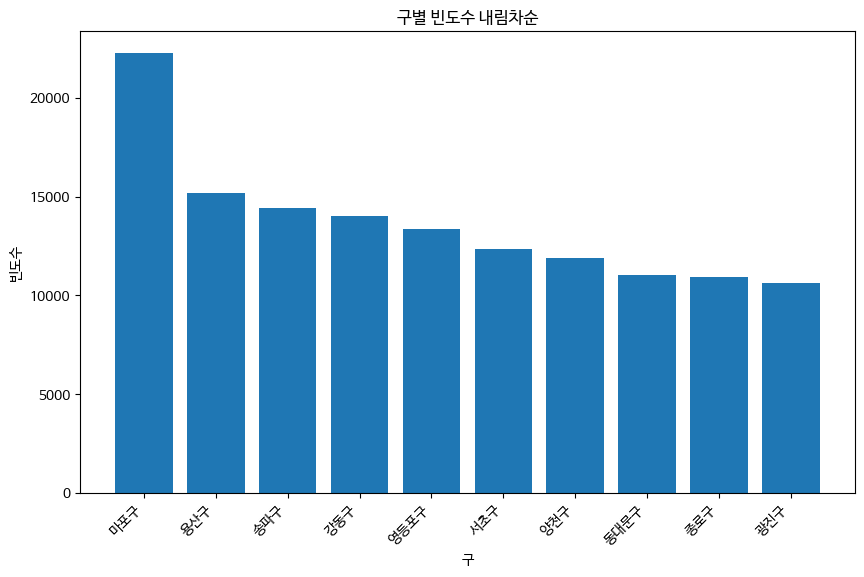

In [15]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

gu_top_10 = gu_top_10.sort_values(by='빈도수',ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(gu_top_10['구'], gu_top_10['빈도수'])
plt.title('구별 빈도수 내림차순')
plt.xlabel('구')
plt.ylabel('빈도수')
plt.xticks(rotation=45, ha='right')
plt.show()

In [47]:
df3.head(2)

,민원접수일,민원접수시간,주소,경도,위도,구
0,20221101,00:00:00,서울특별시 도봉구 노해로63길 84-9,127.046900,37.652460,도봉구
1,20221101,00:02:00,서울 은평구 증산동 199-14,126.904228,37.578658,은평구


In [48]:
df3['구'] = df3['구'].str.replace('서울특별시 ','')
df3['구'] = df3['구'].str.replace('서울 ','')
df3

<ipython-input-48-4f79098e0e59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['구'] = df3['구'].str.replace('서울특별시 ','')
<ipython-input-48-4f79098e0e59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['구'] = df3['구'].str.replace('서울 ','')


,민원접수일,민원접수시간,주소,경도,위도,구
0,20221101,00:00:00,서울특별시 도봉구 노해로63길 84-9,127.046900,37.652460,도봉구
1,20221101,00:02:00,서울 은평구 증산동 199-14,126.904228,37.578658,은평구
2,20221101,00:02:00,서울특별시 도봉구 노해로65길 10,127.046727,37.651949,도봉구
4,20221101,00:03:00,서울특별시 도봉구 노해로65길 17,127.046081,37.652210,도봉구
5,20221101,00:03:00,서울특별시 양천구 남부순환로60길 28-25,126.828841,37.531216,양천구
...,...,...,...,...,...,...
1466609,20231031,23:52:00,서울 은평구 구산동 19-40,126.913154,37.609164,은평구
1466612,20231031,23:55:00,서울특별시 용산구 한남대로20길 47-10,127.009894,37.535221,용산구
1466613,20231031,23:56:00,서울특별시 양천구 목동중앙서로7나길 11,126.865180,37.534377,양천구
1466614,20231031,23:59:00,서울특별시 서초구 반포대로 304 금정빌딩,127.001042,37.506165,서초구


In [50]:
df3[df3['구']=='은평구 구']

,민원접수일,민원접수시간,주소,경도,위도,구


In [51]:
df3['구'] = df3['구'].str.replace(' 구','')

<ipython-input-51-4d6978dd2a47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['구'] = df3['구'].str.replace(' 구','')


In [52]:
df3_filtered = df3[df3['구'].str.len() < 5]
df3_filtered

,민원접수일,민원접수시간,주소,경도,위도,구
0,20221101,00:00:00,서울특별시 도봉구 노해로63길 84-9,127.046900,37.652460,도봉구
1,20221101,00:02:00,서울 은평구 증산동 199-14,126.904228,37.578658,은평구
2,20221101,00:02:00,서울특별시 도봉구 노해로65길 10,127.046727,37.651949,도봉구
4,20221101,00:03:00,서울특별시 도봉구 노해로65길 17,127.046081,37.652210,도봉구
5,20221101,00:03:00,서울특별시 양천구 남부순환로60길 28-25,126.828841,37.531216,양천구
...,...,...,...,...,...,...
1466609,20231031,23:52:00,서울 은평구 구산동 19-40,126.913154,37.609164,은평구
1466612,20231031,23:55:00,서울특별시 용산구 한남대로20길 47-10,127.009894,37.535221,용산구
1466613,20231031,23:56:00,서울특별시 양천구 목동중앙서로7나길 11,126.865180,37.534377,양천구
1466614,20231031,23:59:00,서울특별시 서초구 반포대로 304 금정빌딩,127.001042,37.506165,서초구


In [53]:
df3_filtered.isnull().sum()

민원접수일     0
민원접수시간    0
주소        0
경도        0
위도        0
구         0
dtype: int64

In [54]:
df3_filtered.describe()

,민원접수일,경도,위도
count,8.995350e+05,8.995350e+05,899535.000000
mean,2.022921e+07,2.718888e+02,37.563128
std,3.339147e+03,2.597130e+04,2.541742
min,2.022110e+07,2.601863e+00,-191.027080
25%,2.023021e+07,1.269198e+02,37.518277
50%,2.023051e+07,1.269962e+02,37.546029
75%,2.023081e+07,1.270536e+02,37.567785
max,2.023103e+07,4.655256e+06,2151.244030


In [55]:
print(df3_filtered['위도'].max())
print(df3_filtered['위도'].min())

2151.244029673768
-191.0270804517008


In [56]:
print(df3_filtered['경도'].max())
print(df3_filtered['경도'].min())

4655256.290902487
2.601863


In [57]:
la25 = df3_filtered['위도'].quantile(0.25)
la75 = df3_filtered['위도'].quantile(0.75)
iqr = la75-la25
upper = la75+1.5*iqr
lower = la25-1.5*iqr
df3_filtered = df3_filtered[(df3_filtered['위도']<=upper)&(df3_filtered['위도']>=lower)]

In [58]:
print(df3_filtered['위도'].max())
print(df3_filtered['위도'].min())

37.6420406
37.4440189779747


In [59]:
la25 = df3_filtered['경도'].quantile(0.25)
la75 = df3_filtered['경도'].quantile(0.75)
iqr = la75-la25
upper = la75+1.5*iqr
lower = la25-1.5*iqr
df3_filtered = df3_filtered[(df3_filtered['경도']<=upper)&(df3_filtered['경도']>=lower)]

In [60]:
print(df3_filtered['경도'].max())
print(df3_filtered['경도'].min())

127.24336
126.72285


In [61]:
df3_filtered.isnull().sum()

민원접수일     0
민원접수시간    0
주소        0
경도        0
위도        0
구         0
dtype: int64

In [62]:
df3_filtered['구'].unique()

array(['은평구', '양천구', '성북구', '금천구', '종로구', '송파구', '서초구', '강남구', '중구',
       '구로구', '서대문구', '광진구', ' 중구', '동대문구', '중랑구', '강동구', '용산구', '마포구',
       '성동구', '영등포구', ' 양천구', '관악구', ' 성북구', '구', '강북구', ' 마포구', ' 종로구',
       '도봉구', '노원구', '강서구', ' 중랑구', '연희동', '압구', ' 압구', ' 강동구', ' 광진구',
       ' 용산구', ' 송파구', '동작구', ' 금천구', '걍동구', ' 성동구', '서울중구', '', '로구',
       ' 서초구', '.송파구', '광진구구', ' 강남구', ' 노원구', '청구', ' 강북구', ' 은평구',
       '구로구구', '[용산구', '불광1동', '.용산구', '[중구', ':노원구', '화8)구', '안전공구',
       '강동구구', '원구', '금천ㄴ구', '화3/구', '가1/구', '동대입구', '  중구', ' 강서구', '이구',
       '염/구', '.광진구', '\t종로구', '구로동', '[마포구', '건대입구', '도구', '[성북구',
       'ㅣ강동구', '도노원구', '옹산구', '천호', ' 동작구', '대문구', ' 도봉구', '동재문구', '북구',
       '휘경당구', '숙대입구', '한신청구', '머포구', '강님구', '등포구', ' 관악구', '성북', '강동구 ',
       '광잔구', '[강북구', '동대믄구', '랑구', '양평지구', ':구로구', '울용산구', '관억구', '남구',
       '(구', '.마포구', '수서지구', '\t강남구', '광ㅇ진구', '동대구', '[양천구', '.관악구',
       '.은평구', '깅동구', '삼구', '연신내', '광진구.', '[은평구', '악구', '문구', '  청구',
 

In [63]:
df3_filtered['구'] = df3_filtered['구'].str.strip()

In [64]:
df3_filtered['구'].unique()

array(['은평구', '양천구', '성북구', '금천구', '종로구', '송파구', '서초구', '강남구', '중구',
       '구로구', '서대문구', '광진구', '동대문구', '중랑구', '강동구', '용산구', '마포구', '성동구',
       '영등포구', '관악구', '구', '강북구', '도봉구', '노원구', '강서구', '연희동', '압구', '동작구',
       '걍동구', '서울중구', '', '로구', '.송파구', '광진구구', '청구', '구로구구', '[용산구',
       '불광1동', '.용산구', '[중구', ':노원구', '화8)구', '안전공구', '강동구구', '원구',
       '금천ㄴ구', '화3/구', '가1/구', '동대입구', '이구', '염/구', '.광진구', '구로동', '[마포구',
       '건대입구', '도구', '[성북구', 'ㅣ강동구', '도노원구', '옹산구', '천호', '대문구', '동재문구',
       '북구', '휘경당구', '숙대입구', '한신청구', '머포구', '강님구', '등포구', '성북', '광잔구',
       '[강북구', '동대믄구', '랑구', '양평지구', ':구로구', '울용산구', '관억구', '남구', '(구',
       '.마포구', '수서지구', '광ㅇ진구', '동대구', '[양천구', '.관악구', '.은평구', '깅동구', '삼구',
       '연신내', '광진구.', '[은평구', '악구', '문구', '강일구', '성수아구', '봉구', '남구로',
       ':강동구', '서강지구', '[서초구', '.성동구', '[노원구', '강ㄷ오구', ':송파구', '환일문구',
       '1.로구', '마천동', '노윈구', '웰튼빌옆', '공항지구', '망원동', '마푸구', '맢모구', '초구',
       '진구', '은평', '신촌지구', ',로구', '화1/구', '(송파구', '고척공구', '강변북로', '

In [65]:
import string
to_remove = ".,[]()-=*:|"
translation_table = str.maketrans("","",to_remove)
df3_filtered['구'] = df3_filtered['구'].str.translate(translation_table)

In [66]:
df3_filtered['구'].unique()

array(['은평구', '양천구', '성북구', '금천구', '종로구', '송파구', '서초구', '강남구', '중구',
       '구로구', '서대문구', '광진구', '동대문구', '중랑구', '강동구', '용산구', '마포구', '성동구',
       '영등포구', '관악구', '구', '강북구', '도봉구', '노원구', '강서구', '연희동', '압구', '동작구',
       '걍동구', '서울중구', '', '로구', '광진구구', '청구', '구로구구', '불광1동', '화8구',
       '안전공구', '강동구구', '원구', '금천ㄴ구', '화3/구', '가1/구', '동대입구', '이구', '염/구',
       '구로동', '건대입구', '도구', 'ㅣ강동구', '도노원구', '옹산구', '천호', '대문구', '동재문구',
       '북구', '휘경당구', '숙대입구', '한신청구', '머포구', '강님구', '등포구', '성북', '광잔구',
       '동대믄구', '랑구', '양평지구', '울용산구', '관억구', '남구', '수서지구', '광ㅇ진구', '동대구',
       '깅동구', '삼구', '연신내', '악구', '문구', '강일구', '성수아구', '봉구', '남구로', '서강지구',
       '강ㄷ오구', '환일문구', '1로구', '마천동', '노윈구', '웰튼빌옆', '공항지구', '망원동', '마푸구',
       '맢모구', '초구', '진구', '은평', '신촌지구', '화1/구', '고척공구', '강변북로', '태릉입구',
       '동대문', '50구', '마초구', '산구', '의릉입구', '1호선구', '서울구', '신사지구', '굉진구',
       '동구', '우구', '그로구', '영동포구', '구산동', '서울시', '천구', '구초구', '둥대문구', '파구',
       '묵동', '홍대입구', '사울로구', '신월3동', '진흥문구', '광진', '포구', 

In [68]:
selected_values = ['강서구', '양천구', '구로구', '영등포구', '금천구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', '광진구', '성동구', '용산구', '중구', '마포구', '서대문구', '은평구', '종로구', '성북구', '동대문구', '중랑구', '노원구', '강북구', '도봉구']

df3_filtered = df3_filtered[df3_filtered['구'].isin(selected_values)]
df3_filtered['구'].unique()

array(['은평구', '양천구', '성북구', '금천구', '종로구', '송파구', '서초구', '강남구', '중구',
       '구로구', '서대문구', '광진구', '동대문구', '중랑구', '강동구', '용산구', '마포구', '성동구',
       '영등포구', '관악구', '강북구', '도봉구', '노원구', '강서구', '동작구'], dtype=object)

In [45]:
df3_filtered['구'] = df3_filtered['구'].str.replace('강동구구','강동구')
df3_filtered['구'] = df3_filtered['구'].str.replace('원구','노원구')
df3_filtered['구'] = df3_filtered['구'].str.replace('구로구구','구로구')
df3_filtered['구'] = df3_filtered['구'].str.replace('강동구구','강동구')
df3_filtered['구'] = df3_filtered['구'].str.replace('금천ㄴ구','금천구')
df3_filtered['구'] = df3_filtered['구'].str.replace('동대입구','동대문구')
df3_filtered['구'] = df3_filtered['구'].str.replace('ㅣ강동구','강동구')
df3_filtered['구'] = df3_filtered['구'].str.replace('도노원구','노원구')
df3_filtered['구'] = df3_filtered['구'].str.replace('옹산구','용산구')
df3_filtered['구'] = df3_filtered['구'].str.replace('북구','성북구')
df3_filtered['구'] = df3_filtered['구'].str.replace('머포구','마포구')
df3_filtered['구'] = df3_filtered['구'].str.replace('강님구','강남구')
df3_filtered['구'] = df3_filtered['구'].str.replace('등포구','영등포구')
df3_filtered['구'] = df3_filtered['구'].str.replace('성북','성북구')
df3_filtered['구'] = df3_filtered['구'].str.replace('광잔구','광진구')
df3_filtered['구'] = df3_filtered['구'].str.replace('동대믄구','동대문구')
df3_filtered['구'] = df3_filtered['구'].str.replace('랑구','중랑구')
df3_filtered['구'] = df3_filtered['구'].str.replace('동대믄구','동대문구')
df3_filtered['구'] = df3_filtered['구'].str.replace('관억구','관악구')
df3_filtered['구'] = df3_filtered['구'].str.replace('남구','강남구')
df3_filtered['구'] = df3_filtered['구'].str.replace('광ㅇ진구','광진구')
df3_filtered['구'] = df3_filtered['구'].str.replace('깅동구','강동구')
df3_filtered['구'] = df3_filtered['구'].str.replace('마푸구','마포구')
df3_filtered['구'] = df3_filtered['구'].str.replace('맢모구','마포구')
df3_filtered['구'] = df3_filtered['구'].str.replace('초구','서초구')
df3_filtered['구'] = df3_filtered['구'].str.replace('진구','광진구')
df3_filtered['구'] = df3_filtered['구'].str.replace('은평','은평구')
df3_filtered['구'] = df3_filtered['구'].str.replace('동대문','동대문구')
df3_filtered['구'] = df3_filtered['구'].str.replace('마초구','마포구')
df3_filtered['구'] = df3_filtered['구'].str.replace('굉진구','광진구')
df3_filtered['구'] = df3_filtered['구'].str.replace('그로구','구로구')
df3_filtered['구'] = df3_filtered['구'].str.replace('영동포구','영등포구')
df3_filtered['구'] = df3_filtered['구'].str.replace('구초구','구로구')
df3_filtered['구'] = df3_filtered['구'].str.replace('둥대문구','동대문구')
df3_filtered['구'] = df3_filtered['구'].str.replace('광진','광진구')
df3_filtered['구'] = df3_filtered['구'].str.replace('은폋구','은평구')
df3_filtered['구'] = df3_filtered['구'].str.replace('중량구','중랑구')
df3_filtered['구'] = df3_filtered['구'].str.replace('미포구','마포구')
df3_filtered['구'] = df3_filtered['구'].str.replace('구로','구로구')
df3_filtered['구'] = df3_filtered['구'].str.replace('영등코구','영등포구')
df3_filtered['구'] = df3_filtered['구'].str.replace('증링구','중랑구')
df3_filtered['구'] = df3_filtered['구'].str.replace('깅북구','강북구')
df3_filtered['구'] = df3_filtered['구'].str.replace('강동','강동구')
df3_filtered['구'] = df3_filtered['구'].str.replace('양등포구','영등포구')
df3_filtered['구'] = df3_filtered['구'].str.replace('성븍구','성북구')
df3_filtered['구'] = df3_filtered['구'].str.replace('죵로구','종로구')
df3_filtered['구'] = df3_filtered['구'].str.replace('울 중구','중구')
df3_filtered['구'] = df3_filtered['구'].str.replace('양처구','양천구')
df3_filtered['구'] = df3_filtered['구'].str.replace('앵천구','양천구')
df3_filtered['구'] = df3_filtered['구'].str.replace('양처구','양천구')
df3_filtered['구'] = df3_filtered['구'].str.replace('영둥포구','영등포구')
df3_filtered['구'] = df3_filtered['구'].str.replace('양전구','양천구')
df3_filtered['구'] = df3_filtered['구'].str.replace('앙쳔구','양천구')
df3_filtered['구'] = df3_filtered['구'].str.replace('소서초구','서초구')
df3_filtered['구'] = df3_filtered['구'].str.replace('서문구','서대문구')
df3_filtered['구'] = df3_filtered['구'].str.replace('영등포','영등포구')
df3_filtered['구'] = df3_filtered['구'].str.replace('영등초구','영등포구')
df3_filtered['구'] = df3_filtered['구'].str.replace('용사구','용산구')
df3_filtered['구'] = df3_filtered['구'].str.replace('여등포구','영등포구')
df3_filtered['구'] = df3_filtered['구'].str.replace('동다문구','동대문구')
df3_filtered['구'] = df3_filtered['구'].str.replace('강북북구','강북구')
df3_filtered['구'] = df3_filtered['구'].str.replace('섬북구','성북구')
df3_filtered['구'] = df3_filtered['구'].str.replace('송팍구','송파구')
df3_filtered['구'] = df3_filtered['구'].str.replace('섬북구','성북구')
df3_filtered['구'] = df3_filtered['구'].str.replace('증랑구','중랑구')
df3_filtered['구'] = df3_filtered['구'].str.replace('강부구','강북구')
df3_filtered['구'] = df3_filtered['구'].str.replace('평구','은평구')
df3_filtered['구'] = df3_filtered['구'].str.replace('미퍼구','마포구')
df3_filtered['구'] = df3_filtered['구'].str.replace('시 중구','중구')

In [46]:
df3_filtered['구'].unique()

array(['은은평구구', '양천구', '성성북구구', '금천구', '종로구', '송파구', '서서초구', '강강남구', '중구',
       '구로구구', '서대문구', '광광진구구', '동대문구구', '중중랑구', '강동구구', '용산구', '마포구',
       '성동구', '영영등포구구', '관악구', '구', '강성북구구', '도봉구', '노노원구', '강서구', '연희동',
       '압구', '동작구', '걍동구', '서울중구', '', '로구', '광광진구구구', '청구', '불광1동',
       '화8구', '안전공구', '노원구', '화3/구', '가1/구', '이구', '염/구', '구로구동', '건대입구',
       '도구', '도노노원구', '천호', '대문구', '동재문구', '성북구구', '휘경당구', '숙대입구', '한신청구',
       '영등포구구', '성북구', '중랑구', '양평지구', '울용산구', '강남구', '수서지구', '동대구', '삼구',
       '연신내', '악구', '문구', '강일구', '성수아구', '봉구', '강남구로구', '서강지구', '강ㄷ오구',
       '환일문구', '1로구', '마천동', '노윈구', '웰튼빌옆', '공항지구', '망원동', '서초구', '광진구구',
       '은은평구', '신촌지구', '화1/구', '고척공구', '강변북로', '태릉입구', '동대문구', '50구',
       '마서초구', '산구', '의릉입구', '1호선구', '서울구', '신사지구', '굉광진구구', '동구', '우구',
       '구산동', '서울시', '천구', '구서초구', '파구', '묵동', '홍대입구', '사울로구', '신월3동',
       '진흥문구', '광진구', '포구', '이마트', '주흥5길', '정릉입구', '구로구', '궁동입구', '구로구5동',
       '서울신구', '깅성북구구', '누구', '잠실야구', '로5동', '천호문구', 

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


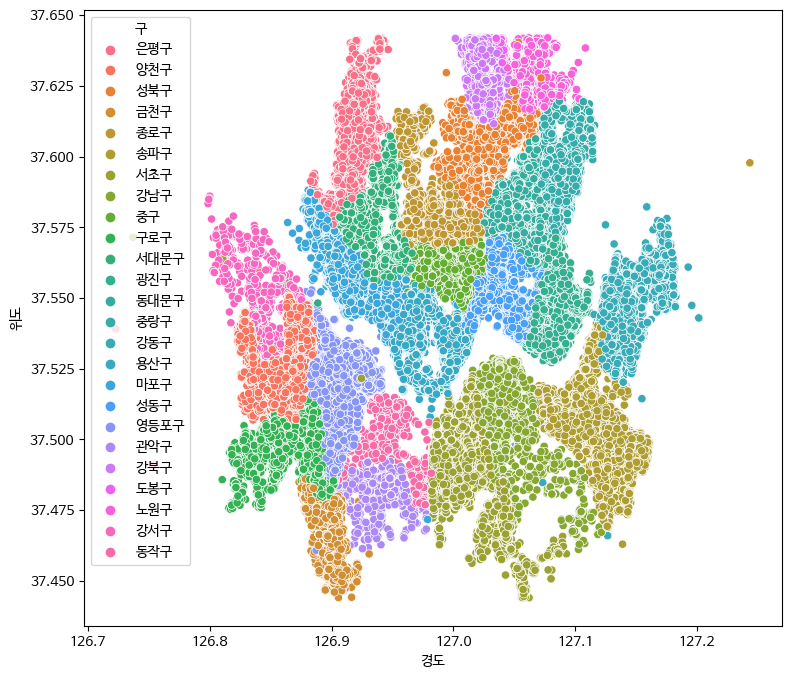

In [69]:
import seaborn as sns
plt.figure(figsize=(9,8))
sns.scatterplot(data=df3_filtered,x='경도',y='위도',hue='구')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


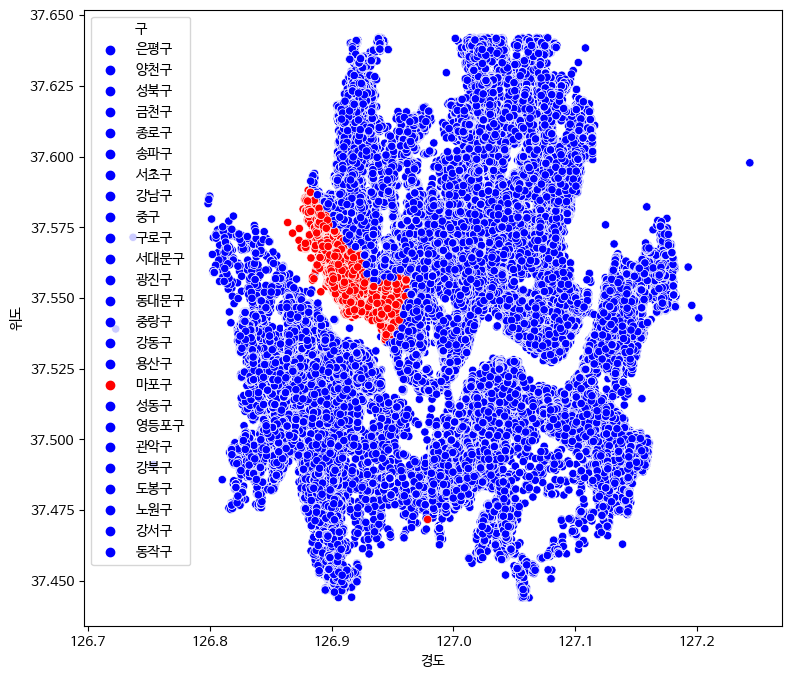

In [71]:
plt.figure(figsize=(9,8))
frequency_by_gu = df3_filtered['구'].value_counts()
most_frequent_gu = frequency_by_gu.idxmax()
all_gu_values = df3_filtered['구'].unique()
palette = {gu: 'red' if gu == most_frequent_gu else 'blue' for gu in all_gu_values}
sns.scatterplot(data=df3_filtered, x='경도', y='위도', hue='구', palette=palette, legend='full')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


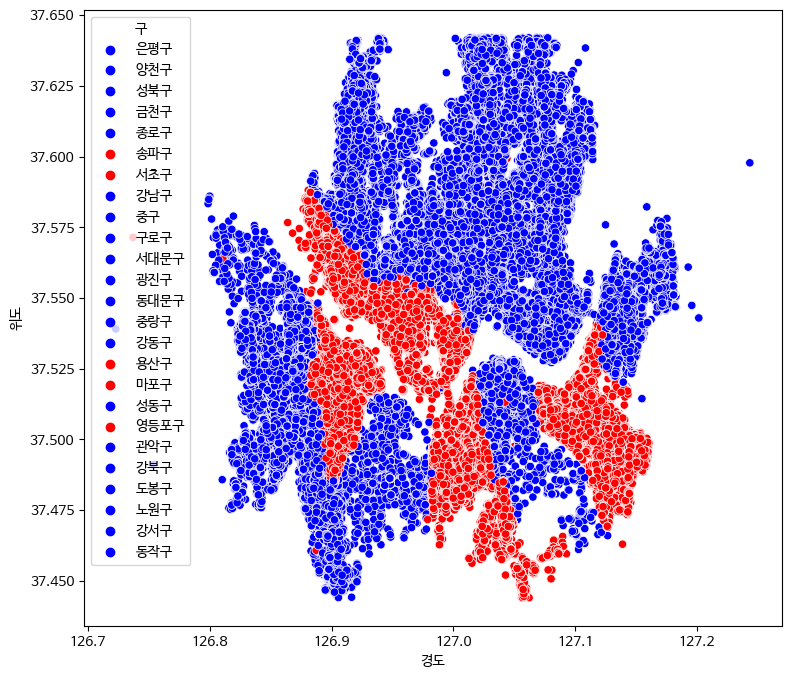

In [72]:
plt.figure(figsize=(9,8))
top5_gu = df3_filtered['구'].value_counts().nlargest(5).index
palette = {gu: 'red' if gu in top5_gu else 'blue' for gu in df3_filtered['구'].unique()}
sns.scatterplot(data=df3_filtered, x='경도', y='위도', hue='구', palette=palette, legend='full')
plt.show()